# Lead in the Water

For my dataset, I decided to analyze neighborhoods based on likelihood of childhood lead exposure. Obviously, for a neighborhood to be suitable to raise kids, there should be a very low chance of lead exposure (ideally none!).

The WPRDC helpfully has historical data going back to 2015, with a column in their dataset ('percentEBLL15_20') representing the total positive cases divided by the number of children tested, as a percent. Because the data is representative only of *tested cases* and is **not** therefore necessarily indicative of lead levels across the entire population of a given neighborhood. This, combined with the fact that before 2018 testing was not mandatory for all children, means that the data may be skewed to the high end, as many cases might have been tested only as the result of some concern, rather than out of peace-of-mind. It is to be noted that wealthier neighborhoods may be more likely to engage in such peace-of-mind testing with generally higher access to medical care, but the Allegheny County Health Department does make child lead testing free.

For our purposes of attemting to compare neighborhoods we will choose to evaluate the neighborhoods on lead exposure only. The same forces will likely be acting upon the city at large, and we can therefore assess that regions of the city with lower incidence of elevated lead levels are generally less likely to expose a child to lead.

In [2]:
# Necessary imports
import pandas as pd
import geopandas as gp
%matplotlib inline

# Read Shapefile which will determine the data we pull from the EBLL file
nb = gp.read_file("neighborhoods/Neighborhoods_.shp")

# Create Dataframe of lead levels
ell = pd.read_csv("elevated-blood-lead-levels.csv")

# Insert column to merge on in neighborhoods geodata
nb.insert(0,"tract",nb['tractce10'].fillna(0).astype("int64", errors='ignore'))
#nb.insert(0,"tract",nb['tractce10'].astype("Int64", errors='ignore').fillna(0))

# Insert column to merge on in lead level dataframe
ell.insert(0,"tract",(ell["CensusTract"]-42003000000))

# Merge the data from lead levels dataframe onto neighborhoods dataframe
ellnb = nb.merge(ell, how="left", on="tract")

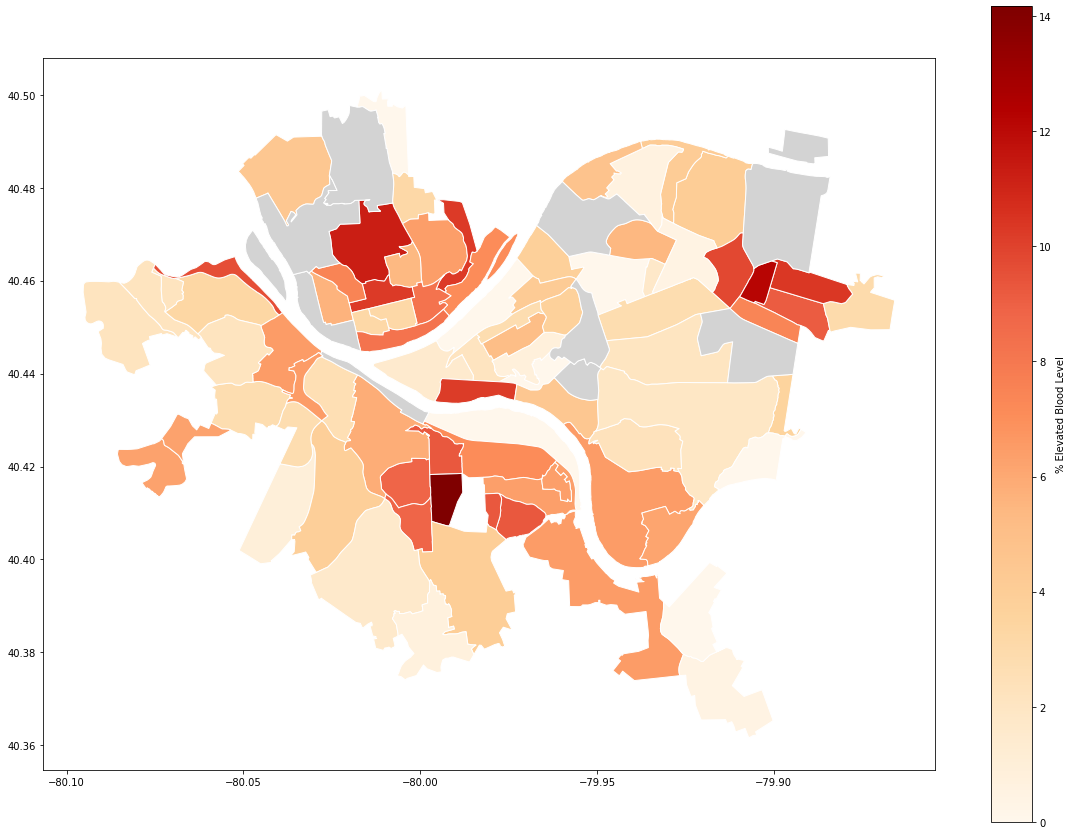

In [3]:
# Plot the data on a map for ease of viewing
ellnb.plot(column='percentEBLL15_20', # set the data to be used for coloring
               cmap='OrRd',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "% Elevated Blood Level"}, # label the legend
               figsize=(20, 15),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )

## A Bird's-eye View
On the map we can see that certain clusters develop, and generally that a neighborhood with high incidence of elevated lead levels indicates that the neighboring neighborhoods are also generally higher.

Three such clusters seem to dominate the map, centered on the three neighborhoods with the highest incidence of EBLL: Knoxville, Homewood West, and Perry South.

hood                36
percentEBLL15_20    36
dtype: int64


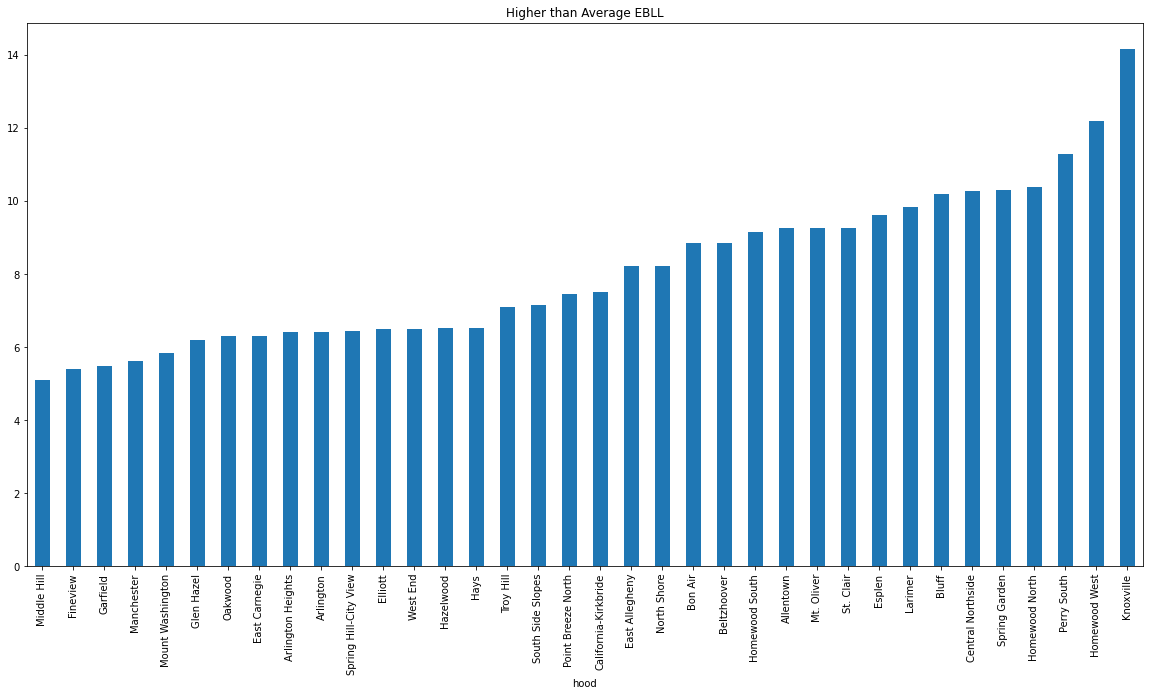

In [5]:
ezview = ellnb[['hood','percentEBLL15_20']].dropna().sort_values('percentEBLL15_20')
mean = ezview['percentEBLL15_20'].mean()
stddev = ezview['percentEBLL15_20'].std()
higher_than_avg = ezview['percentEBLL15_20'] > mean
print(ezview[higher_than_avg].count())
ezview[higher_than_avg].plot(kind='bar',
                             x='hood',
                             y='percentEBLL15_20',
                             figsize=(20,10),
                             #xlabel='Neighborhood',
                             #ylabel='EBLL rate in tested children',
                             legend=False,
                             title='Higher than Average EBLL')

## 36 Utter Failures
Certainly none of these will make the cut. I'd be tempted to disqualify any of these neighborhoods from the running for best neighborhood in the city, but as we've said, ideally a neighborhood will be near zero.

hood                13
percentEBLL15_20    13
dtype: int64


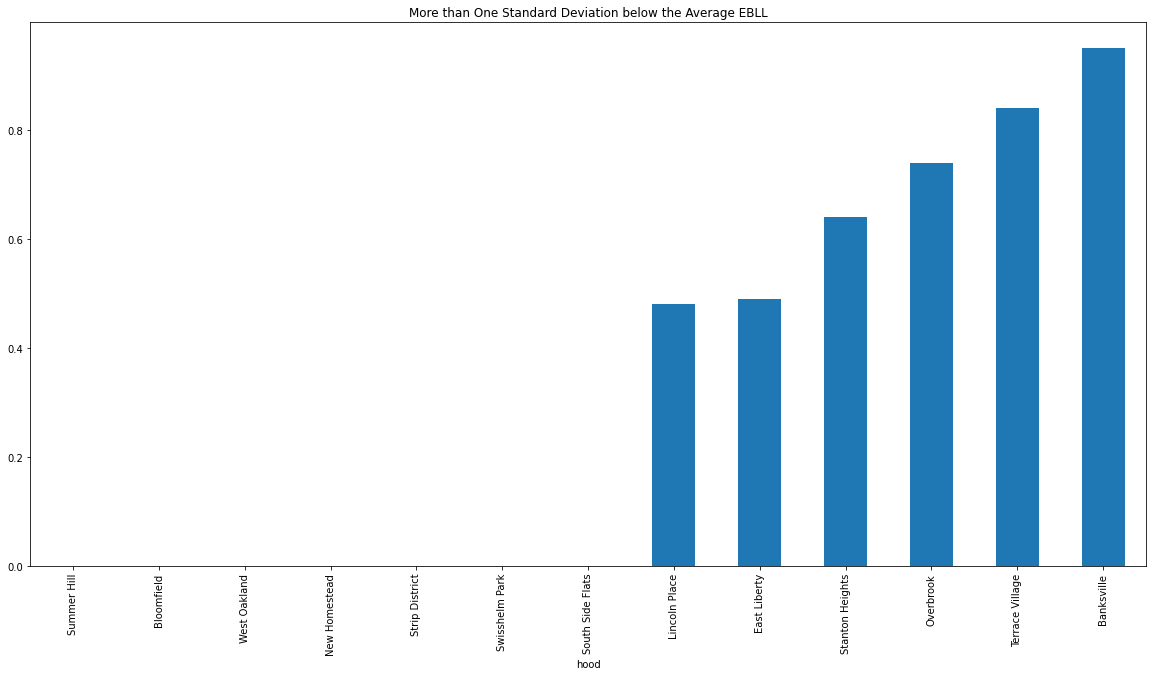

In [6]:
doing_good = ezview['percentEBLL15_20'] < mean - stddev
print(ezview[doing_good].count())
ezview[doing_good].plot(kind='bar',
                        x='hood',
                        y='percentEBLL15_20',
                        figsize=(20,10),
                        #xlabel='Neighborhood',
                        #ylabel='EBLL rate in tested children',
                        legend=False,
                        title='More than One Standard Deviation below the Average EBLL')

## Paragons
Here we see the 13 neighborhoods who are doing exceptionally well for themselves, with EBLL less than 1.41, 1 standard deviation below the mean. Interestingly, they all fall below 1% incidence.

More than that, there are a full *SEVEN* neighborhoods with zero cases in their tests! Such numbers should be taken with a grain of salt, because as stated the collected statistic is only as a percent of tested children, but zero incidence in a population large enough for the ACHD to publish is something to be celebrated.

It's not spectacularly feasible to choose among seven equally-excellent neighborhoods, instead there's a seven-way tie! Congratulations to Summer Hill, Bloomfield, West Oakland, New Homstead, the Strip District, Swisshelm Park, and the South Side Flats for not exposing their children to lead!

At this point, it may be worthwhile for us to give each neighborhood a score, to help us in our later task of determining the best neighborhood in the city. Because of the scale of our data, subtracting a scaled version of the incidence of EBLL from 100 seems reasonable.

In [7]:
scored = ezview.copy()
scored.insert(2,'EBLLscore',100-ezview['percentEBLL15_20']*10)
scored = scored[['hood','EBLLscore']]
scored

,hood,EBLLscore
1,Summer Hill,100.0
24,Bloomfield,100.0
38,West Oakland,100.0
20,New Homestead,100.0
40,Strip District,100.0
...,...,...
7,Spring Garden,-2.9
33,Homewood North,-3.7
4,Perry South,-12.8
34,Homewood West,-22.0
